In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

import os

In [20]:
labels = pd.read_csv("training_data/labels.csv")

# Plot distribution of labels

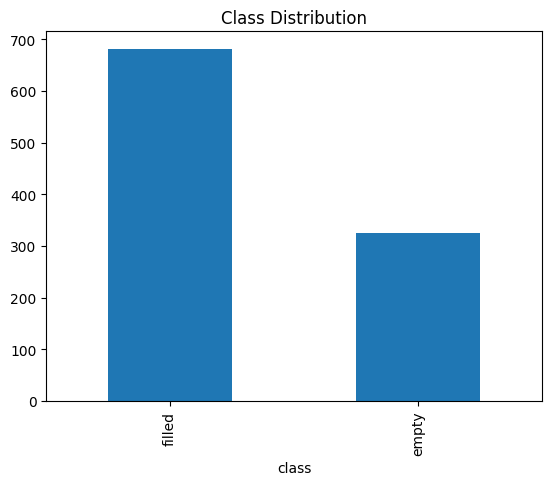

<Figure size 640x480 with 0 Axes>

In [21]:
labels['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [22]:
labels['class'].value_counts()

class
filled    681
empty     325
Name: count, dtype: int64

# Inspect some images of each class

In [12]:
def show_images(class_label, num_images=5):
    img_names = labels["image_path"][labels['class'] == class_label].sample(num_images)
    for img_name in img_names:
        img_path = os.path.join('training_data', img_name)
        print(img_path)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f'Class: {class_label}')
        plt.show()

In [25]:
show_images('empty')
show_images('filled')

# Inspect brightness levels

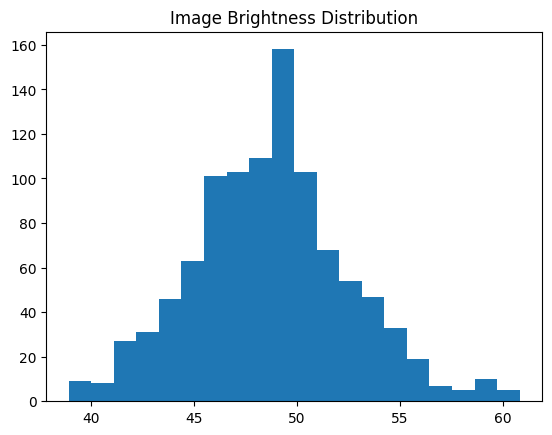

In [8]:
brightness_levels = []
for img_name in labels['image_path']:
    img_path = os.path.join('training_data/', img_name)
    img = Image.open(img_path)
    brightness_levels.append(np.mean(img))

plt.hist(brightness_levels, bins=20)
plt.title('Image Brightness Distribution')
plt.show()

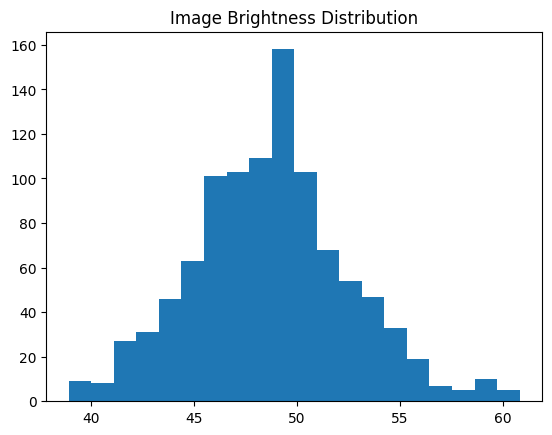